<a href="https://colab.research.google.com/github/ggilflo/IA_2025SVB/blob/main/ASSIGNMENTS/FinalProject/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Final project: Training a Machine Learning Model on Medical Images**

**Team members:**


*   Nelly Fernanda torres Ramírez 2014788
*   Leyanet Piedra Llanes 2011260
*   Ana Sofía Vara Buentello 2109189
*   Guillermo Gil Flores 1963954
*   Mauricio Alejandro Olivares Mata 1973006

**Introduction**
In this project, we are training a convolutional neural network to detect brain tumors in MRI images. First we will preprocess the images and divide 80/20 for training and testing, respectively. Then, we will structure and train our model to finally validate it.

**Libraries and Image Upload from Kaggle**



In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from google.colab import files
import zipfile

#Setup Kaggle and download data set
!pip install -q kaggle
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

import zipfile
zip_file_path = '/content/brain-mri-images-for-brain-tumor-detection.zip'
extracted_folder_path = '/content/brain_tumor_dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

**Image preprocessing**

In [ ]:
imagenes = []
etiquetas = []
IMG_SIZE = 28

#File route for "yes" and "no" files
dataset_path = '/content/brain_tumor_dataset/brain_tumor_dataset'

# "Yes" label = 1; "No" label = 0
class_labels = {'yes': 1, 'no': 0}

#Image load
for label_name, label_id in class_labels.items():
    folder_path = os.path.join(dataset_path, label_name)
    for img_file in glob.glob(f"{folder_path}/*.jpg"):
        image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            img_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            imagenes.append(np.array(img_resized))
            etiquetas.append(label_id)

#Convert to numpy arrays and shape correctly
imagenes = np.array(imagenes).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
etiquetas = np.array(etiquetas)

#Normalize pixel values
imagenes = imagenes / 255.0

#Split data into training and validation, 0.8 for training to have more accurate models
train_images, test_images, train_labels, test_labels = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42, stratify=etiquetas
)

#Verification
print(f"Train images shape: {train_images.shape}")
print(f"Train labels count: {len(train_labels)}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels count: {len(test_labels)}")

**CNN training**

In [ ]:
#Structure of CNN, increase in image size for better accuracy
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Model training from images
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

**Accuracy results**

In [ ]:
#Accuracy plot. It compares training and validation accuracy.
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 10])
plt.legend(loc='lower right')
plt.title("Training vs Validation Accuracy")
plt.show()

#Model evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

**CNN Predictions**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


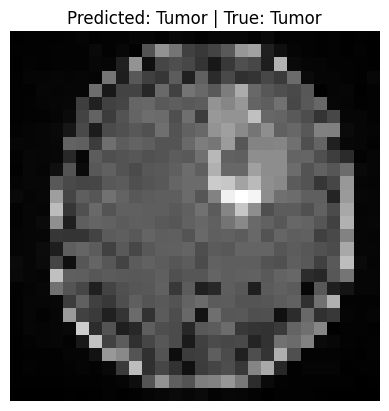

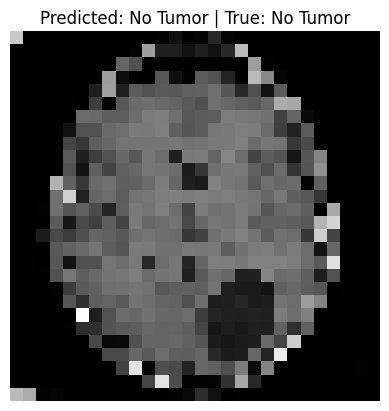

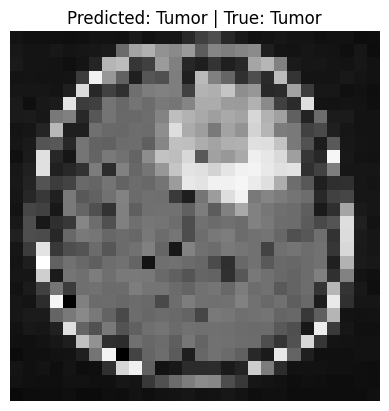

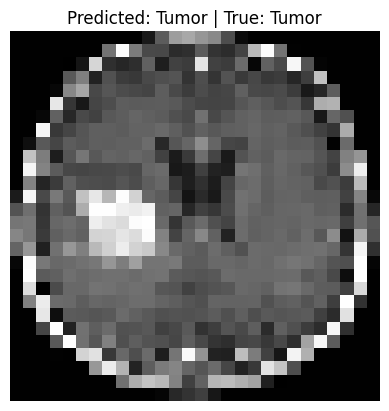

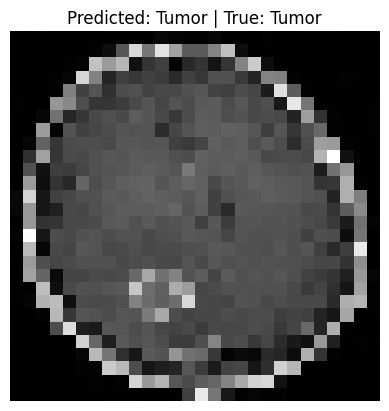

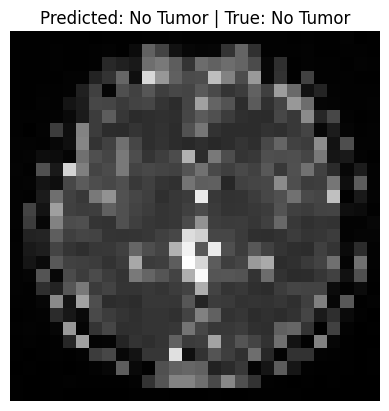

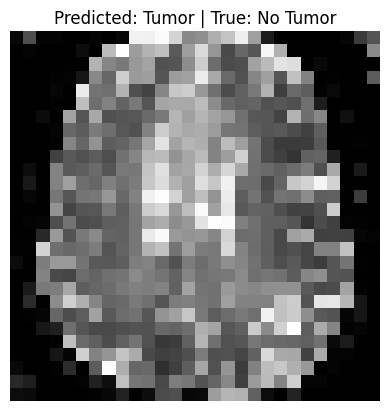

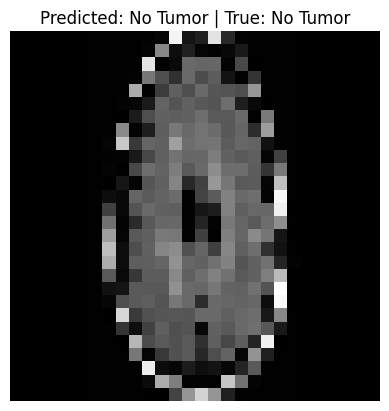

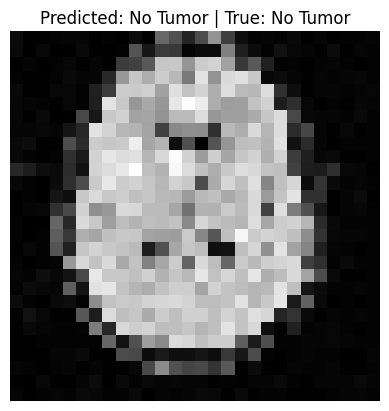

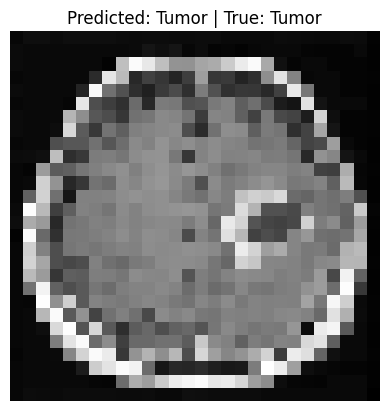

In [9]:
predictions = model.predict(test_images)

indices_to_show = [i for i in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28] if i < len(test_images)]

for i in indices_to_show:
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.imshow(test_images[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Predicted: {'Tumor' if pred_label == 1 else 'No Tumor'} | True: {'Tumor' if true_label == 1 else 'No Tumor'}")
    plt.axis('off')
    plt.show()